# **Anomaly Detection and Data Labeling

# **IMPORT THE REQUIRES LIBRARIES**

In [ ]:
!pip install modAL
!pip install activelearner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.9/341.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 7.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.3 MB/s eta 0:00:00
  Created wheel for grpclib: filename=grpclib-0.4.3-py3-none-any.whl size=77059 sha256=57aaa625f7a602ffde985999dcdd1ed16904e293da098128fe134aef577f1d14
  Stored in directory: /root/.cache/pip/wheels/e0/49/4d/31aa7f3f43e9833b8e79204457b404ad4434fc2278a32fa9f1
Successfully built grpclib
  Attempting unin

In [ ]:
!pip3 install modAL-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Load Dataset

In [ ]:
# Load the XLSX file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/hai-23.05/hai-test2.csv')

# Print the first 5 rows of the DataFrame
print(df.head())

             timestamp  P1_FCV01D  P1_FCV01Z  P1_FCV02D  P1_FCV02Z  P1_FCV03D  \
0  2022-08-17 00:00:01   17.19011   16.27502   15.00000   37.91962   51.16745   
1  2022-08-17 00:00:02   16.38527   17.37366   15.00000   36.05804   51.22186   
2  2022-08-17 00:00:03   16.38527   17.37366   27.11249   33.90656   51.15362   
3  2022-08-17 00:00:04   15.42875   17.41943  100.00000   31.89240   51.16975   
4  2022-08-17 00:00:05   14.59108   17.32025  100.00000   30.33600   51.22416   

   P1_FCV03Z   P1_FT01   P1_FT01Z    P1_FT02  ...  P4_ST_PS  P4_ST_PT01  \
0   51.27106  55.16052  282.23703  161.78131  ...   1.13254        9913   
1   51.27106  54.77904  287.20242  189.24710  ...   1.13254        9913   
2   51.27106  54.01608  285.21619  212.89825  ...   1.13254        9913   
3   51.27106  54.58834  281.24371  230.06436  ...   1.13254        9913   
4   51.27106  54.39756  284.22327  228.15703  ...   1.13254        9913   

   P4_ST_TT01  x1001_05_SETPOINT_OUT  x1001_15_ASSIGN_OUT  \
0

In [ ]:
print(df.columns)
print(df.shape)

Index(['timestamp', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FCV02D', 'P1_FCV02Z',
       'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01', 'P1_FT01Z', 'P1_FT02', 'P1_FT02Z',
       'P1_FT03', 'P1_FT03Z', 'P1_LCV01D', 'P1_LCV01Z', 'P1_LIT01',
       'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02D', 'P1_PCV02Z', 'P1_PIT01',
       'P1_PIT01_HH', 'P1_PIT02', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD',
       'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_PP04', 'P1_PP04D', 'P1_PP04SP',
       'P1_SOL01D', 'P1_SOL03D', 'P1_STSP', 'P1_TIT01', 'P1_TIT02', 'P1_TIT03',
       'P2_24Vdc', 'P2_ATSW_Lamp', 'P2_AutoGO', 'P2_AutoSD', 'P2_Emerg',
       'P2_MASW', 'P2_MASW_Lamp', 'P2_ManualGO', 'P2_ManualSD', 'P2_OnOff',
       'P2_RTR', 'P2_SCO', 'P2_SCST', 'P2_SIT01', 'P2_TripEx', 'P2_VIBTR01',
       'P2_VIBTR02', 'P2_VIBTR03', 'P2_VIBTR04', 'P2_VT01', 'P2_VTR01',
       'P2_VTR02', 'P2_VTR03', 'P2_VTR04', 'P3_FIT01', 'P3_LCP01D',
       'P3_LCV01D', 'P3_LH01', 'P3_LIT01', 'P3_LL01', 'P3_PIT01', 'P4_HT_FD',
       'P4_HT_PO', 'P4_HT_PS', 'P

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DATA EXPLORATION**

In [ ]:
# Print the shape of the DataFrame (number of rows and columns)
print(df.shape)

# Print the column names of the DataFrame
print(df.columns)

(54000, 87)
Index(['timestamp', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FCV02D', 'P1_FCV02Z',
       'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01', 'P1_FT01Z', 'P1_FT02', 'P1_FT02Z',
       'P1_FT03', 'P1_FT03Z', 'P1_LCV01D', 'P1_LCV01Z', 'P1_LIT01',
       'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02D', 'P1_PCV02Z', 'P1_PIT01',
       'P1_PIT01_HH', 'P1_PIT02', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD',
       'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_PP04', 'P1_PP04D', 'P1_PP04SP',
       'P1_SOL01D', 'P1_SOL03D', 'P1_STSP', 'P1_TIT01', 'P1_TIT02', 'P1_TIT03',
       'P2_24Vdc', 'P2_ATSW_Lamp', 'P2_AutoGO', 'P2_AutoSD', 'P2_Emerg',
       'P2_MASW', 'P2_MASW_Lamp', 'P2_ManualGO', 'P2_ManualSD', 'P2_OnOff',
       'P2_RTR', 'P2_SCO', 'P2_SCST', 'P2_SIT01', 'P2_TripEx', 'P2_VIBTR01',
       'P2_VIBTR02', 'P2_VIBTR03', 'P2_VIBTR04', 'P2_VT01', 'P2_VTR01',
       'P2_VTR02', 'P2_VTR03', 'P2_VTR04', 'P3_FIT01', 'P3_LCP01D',
       'P3_LCV01D', 'P3_LH01', 'P3_LIT01', 'P3_LL01', 'P3_PIT01', 'P4_HT_FD',
       'P4_HT_PO', 'P

In [ ]:
# Print summary statistics of numerical columns
print(df.describe())

          P1_FCV01D     P1_FCV01Z     P1_FCV02D     P1_FCV02Z     P1_FCV03D  \
count  54000.000000  54000.000000  54000.000000  54000.000000  54000.000000   
mean      28.147547     27.931378     49.031006     44.625353     51.935039   
std       22.885199     23.217522     41.308508     38.328981      1.279986   
min        0.000000      0.321960     15.000000     12.315370     42.452920   
25%        6.485038      6.044010     15.000000     12.452700     51.126915   
50%       17.603785     17.434690     15.000000     13.391110     51.879785   
75%       51.593612     51.768867    100.000000     97.329710     52.541612   
max       70.905490     70.809930    100.000000     97.383120     59.222950   

          P1_FCV03Z       P1_FT01      P1_FT01Z       P1_FT02      P1_FT02Z  \
count  54000.000000  54000.000000  54000.000000  54000.000000  54000.000000   
mean      52.585759     58.057590    302.288511    931.095186   1469.295900   
std        1.303012      8.056135     41.895627   1

In [ ]:
# Print the number of unique values in each column
print(df.nunique())

timestamp                54000
P1_FCV01D                51896
P1_FCV01Z                 6344
P1_FCV02D                 1258
P1_FCV02Z                 4640
                         ...  
x1002_07_SETPOINT_OUT       99
x1002_08_SETPOINT_OUT       64
x1003_10_SETPOINT_OUT    10073
x1003_18_SETPOINT_OUT       34
x1003_24_SUM_OUT         10429
Length: 87, dtype: int64


In [ ]:
# Print the data types of each column
print(df.dtypes)

timestamp                 object
P1_FCV01D                float64
P1_FCV01Z                float64
P1_FCV02D                float64
P1_FCV02Z                float64
                          ...   
x1002_07_SETPOINT_OUT    float64
x1002_08_SETPOINT_OUT    float64
x1003_10_SETPOINT_OUT    float64
x1003_18_SETPOINT_OUT    float64
x1003_24_SUM_OUT         float64
Length: 87, dtype: object


In [ ]:
# Print the number of missing values in each column
print(df.isnull().sum())

timestamp                0
P1_FCV01D                0
P1_FCV01Z                0
P1_FCV02D                0
P1_FCV02Z                0
                        ..
x1002_07_SETPOINT_OUT    0
x1002_08_SETPOINT_OUT    0
x1003_10_SETPOINT_OUT    0
x1003_18_SETPOINT_OUT    0
x1003_24_SUM_OUT         0
Length: 87, dtype: int64


In [ ]:
print(df.head)

<bound method NDFrame.head of                  timestamp  P1_FCV01D  P1_FCV01Z  P1_FCV02D  P1_FCV02Z  \
0      2022-08-12 16:00:01   60.99316   60.49500   15.00000   12.44507   
1      2022-08-12 16:00:02   60.93707   60.50262   15.00000   12.44507   
2      2022-08-12 16:00:03   61.08963   60.50262   15.00000   12.44507   
3      2022-08-12 16:00:04   61.07578   60.50262   15.00000   12.44507   
4      2022-08-12 16:00:05   61.16922   60.50262   15.00000   12.44507   
...                    ...        ...        ...        ...        ...   
53995  2022-08-13 06:59:56   17.36364   18.10608   15.00000   50.85144   
53996  2022-08-13 06:59:57   16.99720   18.09845   15.00000   48.93646   
53997  2022-08-13 06:59:58   16.56874   18.10608   15.00000   47.04437   
53998  2022-08-13 06:59:59   16.12993   17.73987   15.00000   45.22095   
53999  2022-08-13 07:00:00   15.34155   16.31317   41.93636   43.24493   

       P1_FCV03D  P1_FCV03Z   P1_FT01   P1_FT01Z     P1_FT02  ...  P4_ST_PS  \
0 

# **DATA PREPROCESSING**

In [ ]:
# Print the shape of the DataFrame (number of rows and columns)
print(df.shape)

(230400, 87)


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Encoding and Filtering

In [ ]:
# target_points = [
#     "P1_PIT01", "P1_PCV01D", "P1_FT03", "P1_LIT01", "P1_FCV03D",
#     "P1_LCV01D", "P1_PP04", "P1_FCV01D", "P1_TIT01", "P1_TIT03"
# ]

# # Filter the DataFrame to include only columns in the 'controllers' list
# df_filtered = df[target_points]

# **Data Labeling and Normalizing**

In [ ]:
# Assuming df is your DataFrame and it has a 'timestamp' column
df['timestamp'] = pd.to_datetime(df['timestamp'])

# List of attack periods
attack_periods = [
    ("2022-08-17 01:27:06", "2022-08-17 01:29:18"),
    ("2022-08-17 03:37:02", "2022-08-17 03:39:13"),
    ("2022-08-17 04:21:03", "2022-08-17 04:22:11"),
    ("2022-08-17 05:46:02", "2022-08-17 05:48:04"),
    ("2022-08-17 06:21:05", "2022-08-17 06:22:30"),
    ("2022-08-17 08:36:01", "2022-08-17 08:39:17"),
    ("2022-08-17 09:42:04", "2022-08-17 09:52:18"),
    ("2022-08-17 10:36:02", "2022-08-17 10:38:15"),
    ("2022-08-17 11:35:05", "2022-08-17 11:36:30"),
    ("2022-08-17 12:25:05", "2022-08-17 12:26:33"),
    ("2022-08-17 13:47:05", "2022-08-17 13:50:29"),
    ("2022-08-17 14:25:04", "2022-08-17 14:27:11"),
    ("2022-08-17 15:13:01", "2022-08-17 15:22:00"),
    ("2022-08-17 17:34:04", "2022-08-17 17:35:05"),
    ("2022-08-17 18:16:04", "2022-08-17 18:18:31"),
    ("2022-08-17 19:40:03", "2022-08-17 19:41:38"),
    ("2022-08-17 20:12:03", "2022-08-17 20:20:28"),
    ("2022-08-17 22:41:01", "2022-08-17 22:44:35"),
    ("2022-08-17 23:38:04", "2022-08-17 23:40:15"),
    ("2022-08-18 13:48:03", "2022-08-18 13:50:14"),
    ("2022-08-18 14:58:52", "2022-08-18 15:00:14"),
    ("2022-08-18 16:20:20", "2022-08-18 16:23:51"),
    ("2022-08-18 17:38:10", "2022-08-18 17:39:29"),
    ("2022-08-18 18:45:06", "2022-08-18 18:46:53"),
    ("2022-08-18 19:21:01", "2022-08-18 19:22:01"),
    ("2022-08-18 20:32:09", "2022-08-18 20:34:07"),
    ("2022-08-18 21:41:02", "2022-08-18 21:43:14"),
    ("2022-08-18 23:15:01", "2022-08-18 23:17:36"),
    ("2022-08-19 01:23:04", "2022-08-19 01:24:59"),
    ("2022-08-19 02:43:01", "2022-08-19 02:45:35"),
    ("2022-08-19 04:34:01", "2022-08-19 04:35:36"),
    ("2022-08-19 05:14:02", "2022-08-19 05:16:35"),
    ("2022-08-19 06:46:01", "2022-08-19 07:20:12"),
    ("2022-08-19 08:24:01", "2022-08-19 08:32:50"),
    ("2022-08-19 09:27:33", "2022-08-19 09:28:59"),
    ("2022-08-19 10:34:00", "2022-08-19 10:35:59"),
    ("2022-08-19 14:18:00", "2022-08-19 14:21:09"),
    ("2022-08-19 14:51:00", "2022-08-19 14:53:02")
]

# Convert attack periods to datetime and create a mask
attack_periods = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in attack_periods]
mask = np.zeros(len(df), dtype=bool)
for start, end in attack_periods:
    mask |= ((df['timestamp'] >= start - pd.Timedelta(minutes=5)) & (df['timestamp'] <= end + pd.Timedelta(minutes=5)))

# Filter the DataFrame
df_subset = df[mask]
df=df_subset

# Convert attack periods to datetime
attack_periods = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in attack_periods]

# Initialize a new column for attack labels
df['attack'] = 0

# Label the attacks
for start, end in attack_periods:
    df.loc[(df['timestamp'] >= start) & (df['timestamp'] <= end), 'attack'] = 1


<ipython-input-6-1bdd62142919>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['attack'] = 0


In [ ]:
print(df.columns)
print(df.shape)

Index(['timestamp', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FCV02D', 'P1_FCV02Z',
       'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01', 'P1_FT01Z', 'P1_FT02', 'P1_FT02Z',
       'P1_FT03', 'P1_FT03Z', 'P1_LCV01D', 'P1_LCV01Z', 'P1_LIT01',
       'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02D', 'P1_PCV02Z', 'P1_PIT01',
       'P1_PIT01_HH', 'P1_PIT02', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD',
       'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_PP04', 'P1_PP04D', 'P1_PP04SP',
       'P1_SOL01D', 'P1_SOL03D', 'P1_STSP', 'P1_TIT01', 'P1_TIT02', 'P1_TIT03',
       'P2_24Vdc', 'P2_ATSW_Lamp', 'P2_AutoGO', 'P2_AutoSD', 'P2_Emerg',
       'P2_MASW', 'P2_MASW_Lamp', 'P2_ManualGO', 'P2_ManualSD', 'P2_OnOff',
       'P2_RTR', 'P2_SCO', 'P2_SCST', 'P2_SIT01', 'P2_TripEx', 'P2_VIBTR01',
       'P2_VIBTR02', 'P2_VIBTR03', 'P2_VIBTR04', 'P2_VT01', 'P2_VTR01',
       'P2_VTR02', 'P2_VTR03', 'P2_VTR04', 'P3_FIT01', 'P3_LCP01D',
       'P3_LCV01D', 'P3_LH01', 'P3_LIT01', 'P3_LL01', 'P3_PIT01', 'P4_HT_FD',
       'P4_HT_PO', 'P4_HT_PS', 'P

In [ ]:
df.head

<bound method NDFrame.head of                  timestamp  P1_FCV01D  P1_FCV01Z  P1_FCV02D  P1_FCV02Z  \
4925   2022-08-17 01:22:06   48.83263   49.35608       15.0   12.33063   
4926   2022-08-17 01:22:07   48.47538   49.36371       15.0   12.33063   
4927   2022-08-17 01:22:08   48.24354   49.36371       15.0   12.33063   
4928   2022-08-17 01:22:09   48.24354   49.36371       15.0   12.33063   
4929   2022-08-17 01:22:10   47.76793   49.14246       15.0   12.33063   
...                    ...        ...        ...        ...        ...   
226677 2022-08-19 14:57:58   14.01706   16.72516      100.0   38.32397   
226678 2022-08-19 14:57:59   12.92702   16.67175      100.0   36.78283   
226679 2022-08-19 14:58:00   12.27209   15.05432      100.0   36.57684   
226680 2022-08-19 14:58:01   12.33253   12.83417      100.0   36.57684   
226681 2022-08-19 14:58:02   13.36125   12.24670      100.0   40.14740   

        P1_FCV03D  P1_FCV03Z   P1_FT01   P1_FT01Z     P1_FT02  ...  \
4925     54

In [ ]:
total_labeled_rows = len(df[df['attack'] == 1])
print("Total number of rows labeled with attacks:", total_labeled_rows)
total_nonlabeled_rows = len(df[df['attack'] == 0])
print("Total number of rows not labeled:", total_nonlabeled_rows)

Total number of rows labeled with attacks: 8403
Total number of rows not labeled: 22800


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate the Attack column
attack_series = df.pop('attack')

# Normalize the numeric columns, exclude the Attack column
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col != 'attack']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Add the Attack column back to the dataframe
df['attack'] = attack_series

# Fill missing values with zeros
df.fillna(0, inplace=True)


<ipython-input-7-7ca1d557845c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [ ]:
print(df.head())

            timestamp  P1_FCV01D  P1_FCV01Z  P1_FCV02D  P1_FCV02Z  P1_FCV03D  \
0 2022-08-17 00:00:01  -0.331175  -0.360075  -0.893741  -0.252215  -0.850935   
1 2022-08-17 00:00:02  -0.367722  -0.310719  -0.893741  -0.299908  -0.828399   
2 2022-08-17 00:00:03  -0.367722  -0.310719  -0.604528  -0.355028  -0.856663   
3 2022-08-17 00:00:04  -0.411155  -0.308663   1.135829  -0.406630  -0.849982   
4 2022-08-17 00:00:05  -0.449192  -0.313119   1.135829  -0.446504  -0.827446   

   P1_FCV03Z   P1_FT01  P1_FT01Z   P1_FT02  ...  P4_ST_PT01  P4_ST_TT01  \
0  -1.055261 -0.374208 -0.612644 -0.672473  ...   -1.495427   -1.308098   
1  -1.055261 -0.393340 -0.539571 -0.642766  ...   -1.495427   -1.284401   
2  -1.055261 -0.431602 -0.568801 -0.617184  ...   -1.495427   -1.284401   
3  -1.055261 -0.402903 -0.627263 -0.598617  ...   -1.495427   -1.300199   
4  -1.055261 -0.412471 -0.583414 -0.600680  ...   -1.495427   -1.284401   

   x1001_05_SETPOINT_OUT  x1001_15_ASSIGN_OUT  x1002_07_SETPOINT_OUT

In [ ]:
if (df['attack'] > 0 ).any():
  print("The Attack column has values greater than 0")
else:
  print("it has none")

The Attack column has values greater than 0


In [ ]:
print(df.columns)

Index(['timestamp', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FCV02D', 'P1_FCV02Z',
       'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01', 'P1_FT01Z', 'P1_FT02', 'P1_FT02Z',
       'P1_FT03', 'P1_FT03Z', 'P1_LCV01D', 'P1_LCV01Z', 'P1_LIT01',
       'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02D', 'P1_PCV02Z', 'P1_PIT01',
       'P1_PIT01_HH', 'P1_PIT02', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD',
       'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_PP04', 'P1_PP04D', 'P1_PP04SP',
       'P1_SOL01D', 'P1_SOL03D', 'P1_STSP', 'P1_TIT01', 'P1_TIT02', 'P1_TIT03',
       'P2_24Vdc', 'P2_ATSW_Lamp', 'P2_AutoGO', 'P2_AutoSD', 'P2_Emerg',
       'P2_MASW', 'P2_MASW_Lamp', 'P2_ManualGO', 'P2_ManualSD', 'P2_OnOff',
       'P2_RTR', 'P2_SCO', 'P2_SCST', 'P2_SIT01', 'P2_TripEx', 'P2_VIBTR01',
       'P2_VIBTR02', 'P2_VIBTR03', 'P2_VIBTR04', 'P2_VT01', 'P2_VTR01',
       'P2_VTR02', 'P2_VTR03', 'P2_VTR04', 'P3_FIT01', 'P3_LCP01D',
       'P3_LCV01D', 'P3_LH01', 'P3_LIT01', 'P3_LL01', 'P3_PIT01', 'P4_HT_FD',
       'P4_HT_PO', 'P4_HT_PS', 'P

Summary Statistics for P1_PIT01 during Normal operation:
count    221997.000000
mean         -0.006670
std           0.843059
min          -8.292738
25%          -0.504785
50%           0.033355
75%           0.541887
max           7.407414
Name: P1_PIT01, dtype: float64

Summary Statistics for {point} during Attack:
count    8403.000000
mean        0.176225
std         2.934374
min        -8.517435
25%        -0.688092
50%         0.145742
75%         0.861221
max         7.413304
Name: P1_PIT01, dtype: float64


Summary Statistics for P1_PCV01D during Normal operation:
count    221997.000000
mean         -0.027428
std           0.712146
min          -5.507265
25%          -0.509854
50%          -0.044966
75%           0.424584
max           8.888784
Name: P1_PCV01D, dtype: float64

Summary Statistics for {point} during Attack:
count    8403.000000
mean        0.724614
std         3.671125
min        -8.000646
25%        -0.591634
50%         0.011600
75%         0.843105
max        1

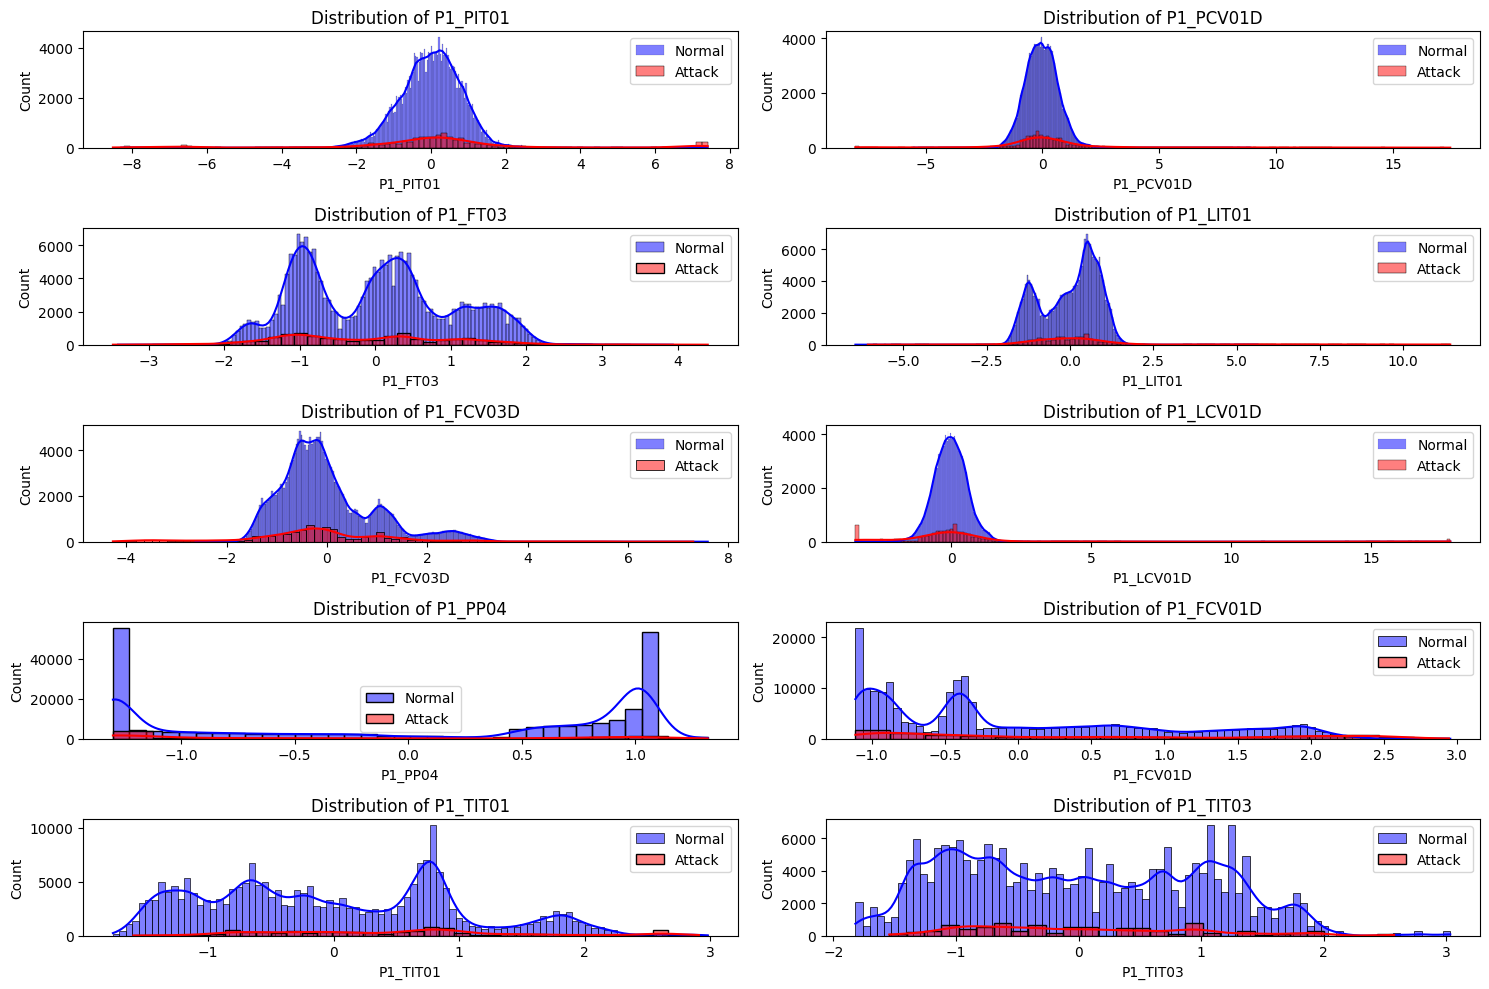

In [ ]:
# Splitting the dataset into attack and normal instances
df_attack = df[df['attack'] == 1]
df_normal = df[df['attack'] == 0]

# Calculating and comparing summary statistics for each target point
for point in target_points:
    print(f"Summary Statistics for {point} during Normal operation:")
    print(df_normal[point].describe())
    print("\nSummary Statistics for {point} during Attack:")
    print(df_attack[point].describe())
    print("\n")

# Plotting distributions for each target point for both normal and attack scenarios
plt.figure(figsize=(15, 10))
for i, point in enumerate(target_points):
    plt.subplot(len(target_points) // 2, 2, i + 1)
    sns.histplot(df_normal[point], kde=True, color='blue', label='Normal')
    sns.histplot(df_attack[point], kde=True, color='red', label='Attack')
    plt.title(f"Distribution of {point}")
    plt.legend()
    plt.tight_layout()

plt.show()


In [ ]:
# Improve weak labeling function
def weak_label(row, threshold_multiplier=2):
    thresholds = {
    'P1_PIT01': (-0.0067, 0.843),
    'P1_PCV01D': (-0.0274, 0.712),
    'P1_FT03': (0.0043, 0.993),
    'P1_LIT01': (-0.0215, 0.872),
    'P1_FCV03D': (0.0028, 0.969),
    'P1_LCV01D': (-0.0177, 0.716),
    'P1_PP04': (0.0158, 0.998),
    'P1_FCV01D': (-0.0146, 0.985),
    'P1_TIT01': (-0.0193, 0.994),
    'P1_TIT03': (-0.0012, 1.002),
    }
    for sensor, (mean, std) in thresholds.items():
        if row[sensor] > (mean + threshold_multiplier * std) or row[sensor] < (mean - threshold_multiplier * std):
            return 1
    return row['attack']

df['weak_label'] = df.apply(weak_label, axis=1)


In [ ]:
df.head

<bound method NDFrame.head of                  timestamp  P1_FCV01D  P1_FCV01Z  P1_FCV02D  P1_FCV02Z  \
4925   2022-08-17 01:22:06   0.822091   0.837556  -0.854138  -0.860177   
4926   2022-08-17 01:22:07   0.807697   0.837860  -0.854138  -0.860177   
4927   2022-08-17 01:22:08   0.798357   0.837860  -0.854138  -0.860177   
4928   2022-08-17 01:22:09   0.798357   0.837860  -0.854138  -0.860177   
4929   2022-08-17 01:22:10   0.779194   0.829045  -0.854138  -0.860177   
...                    ...        ...        ...        ...        ...   
226677 2022-08-19 14:57:58  -0.580625  -0.462610   1.185742  -0.200206   
226678 2022-08-19 14:57:59  -0.624543  -0.464738   1.185742  -0.239335   
226679 2022-08-19 14:58:00  -0.650930  -0.529184   1.185742  -0.244566   
226680 2022-08-19 14:58:01  -0.648495  -0.617644   1.185742  -0.244566   
226681 2022-08-19 14:58:02  -0.607048  -0.641052   1.185742  -0.153909   

        P1_FCV03D  P1_FCV03Z   P1_FT01  P1_FT01Z   P1_FT02  ...  P4_ST_TT01  \
49

In [ ]:
df = df.set_index('timestamp')

In [ ]:
df = df.astype(np.float32)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import numpy as np


# Preparing the data
X = df.drop(['attack'], axis=1)  # Include weak_label as a feature
y = df['attack']

# Initialize RandomForest and IsolationForest
rf = RandomForestClassifier(n_estimators=150, random_state=80)
rf.fit(X, y)

iso_forest = IsolationForest(n_estimators=150, contamination=0.27, random_state=80)
iso_forest.fit(X)

# Make predictions
rf_predictions = rf.predict(X)
iso_predictions = iso_forest.predict(X)
iso_predictions_mapped = np.where(iso_predictions == -1, 1, 0)  # Mapping for Isolation Forest

# Combine predictions
combined_predictions = (rf_predictions + iso_predictions_mapped) / 2
final_predictions = np.round(combined_predictions)

# Function to calculate and print metrics including confusion matrix
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(cm)

# Evaluate the ensemble model
print("Ensemble Model Evaluation With Weak Label as Feature:")
evaluate_model(y, final_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Ensemble Model Evaluation With Weak Label as Feature:
Accuracy: 0.8338621286414768
F1 Score: 0.5539494062983996
Precision: 1.0
Recall: 0.38307747233131023
Confusion Matrix:
[[22800     0]
 [ 5184  3219]]


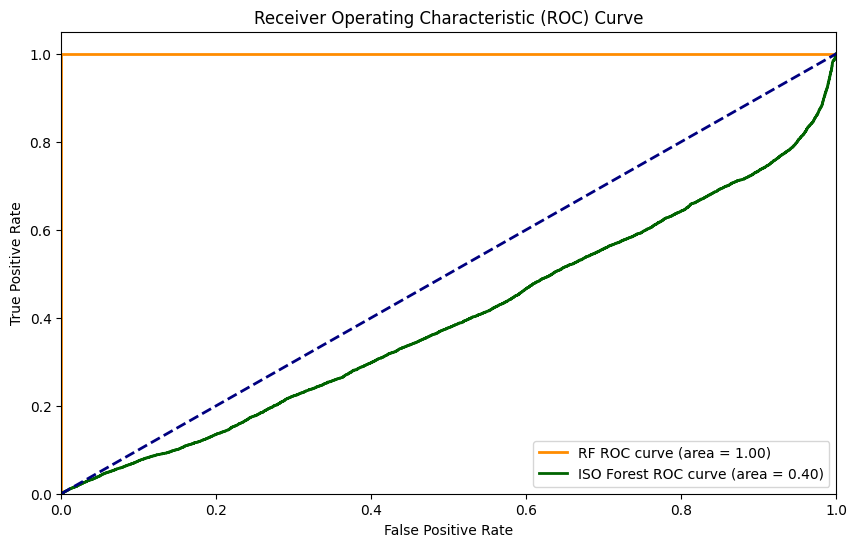

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, auc
# ROC AUC curve
rf_probs = rf.predict_proba(X)[:, 1]
iso_forest_probs = (iso_forest.decision_function(X) + 1) / 2  # Normalize the decision function
roc_auc_rf = roc_auc_score(y, rf_probs)
roc_auc_iso_forest = roc_auc_score(y, iso_forest_probs)

fpr_rf, tpr_rf, _ = roc_curve(y, rf_probs)
fpr_iso_forest, tpr_iso_forest, _ = roc_curve(y, iso_forest_probs)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'RF ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_iso_forest, tpr_iso_forest, color='darkgreen', lw=2, label=f'ISO Forest ROC curve (area = {roc_auc_iso_forest:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

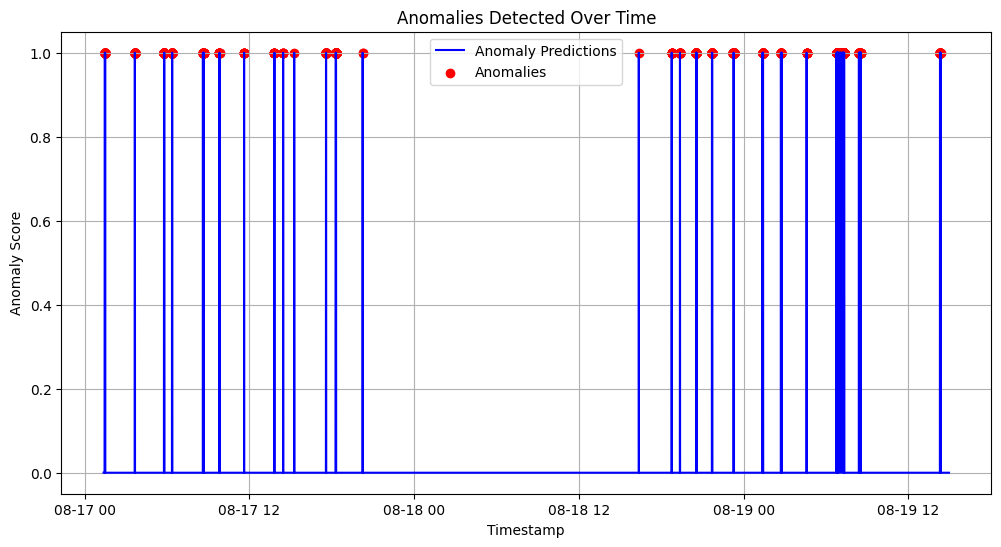

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with timestamps as the index
# and 'final_predictions' containing anomaly labels

# Create a new DataFrame or Series for plotting
plot_data = pd.DataFrame({'Timestamp': df.index, 'Anomaly Predictions': final_predictions})

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(plot_data['Timestamp'], plot_data['Anomaly Predictions'], label='Anomaly Predictions', color='b')

# Highlight anomalies in red
anomalies = plot_data[plot_data['Anomaly Predictions'] == 1]
plt.scatter(anomalies['Timestamp'], anomalies['Anomaly Predictions'], marker='o', color='r', label='Anomalies')

plt.xlabel('Timestamp')
plt.ylabel('Anomaly Score')
plt.title('Anomalies Detected Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Function for active learning loop with fixed number of labels per iteration
def active_learning_loop(X, y, rf, iso_forest, iterations=1, labels_per_iteration=5):
    for i in range(iterations):
        # Get prediction probabilities and anomaly scores
        rf_probs = rf.predict_proba(X)[:, 1]
        iso_scores = iso_forest.decision_function(X)

        # Calculate uncertainty and select the top N uncertain samples
        uncertainty_measure = np.abs(rf_probs - 0.5) + np.abs(iso_scores)
        most_uncertain_indices = np.argsort(uncertainty_measure)[-labels_per_iteration:]

        print(f"Iteration {i+1}: Asking user feedback for {labels_per_iteration} most uncertain samples.")
        for index in most_uncertain_indices:
            print(f"Data: {X.iloc[index]}")
            correct_label = int(input("Enter the correct label (0 or 1): "))
            y.iloc[index] = correct_label  # Update the label with user input

        # Re-train the models
        rf.fit(X, y)
        iso_forest.fit(X)

        # Evaluate and print the updated model performance
        print("Updated Model Evaluation:")
        final_predictions = np.round((rf.predict(X) + np.where(iso_forest.predict(X) == -1, 1, 0)) / 2)
        evaluate_model(y, final_predictions)

# Call the active learning loop
active_learning_loop(X, y, rf, iso_forest)


Iteration 1: Asking user feedback for 5 most uncertain samples.
Data: P1_FCV01D                1.471248
P1_FCV01Z                1.432161
P1_FCV02D               -0.854138
P1_FCV02Z               -0.836738
P1_FCV03D               -1.238290
                           ...   
x1002_08_SETPOINT_OUT   -0.526035
x1003_10_SETPOINT_OUT    1.298209
x1003_18_SETPOINT_OUT    1.800938
x1003_24_SUM_OUT         1.816009
weak_label               1.000000
Name: 2022-08-19 06:46:47, Length: 87, dtype: float32
Enter the correct label (0 or 1): 1
Data: P1_FCV01D                1.465707
P1_FCV01Z                1.431857
P1_FCV02D               -0.854138
P1_FCV02Z               -0.836738
P1_FCV03D               -1.228112
                           ...   
x1002_08_SETPOINT_OUT   -0.526035
x1003_10_SETPOINT_OUT    1.306357
x1003_18_SETPOINT_OUT    1.800938
x1003_24_SUM_OUT         1.812512
weak_label               1.000000
Name: 2022-08-19 06:46:48, Length: 87, dtype: float32
Enter the correct label (0 or 1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Updated Model Evaluation:
Accuracy: 0.8338621286414768
F1 Score: 0.5538726333907057
Precision: 1.0
Recall: 0.3830040466555582
Confusion Matrix:
[[22801     0]
 [ 5184  3218]]
